<a href="https://colab.research.google.com/github/MFSaavedra/QO/blob/main/QO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qutip
import qutip as q
import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 14.6 MB 5.4 MB/s 


#Un poco de juego con qutip

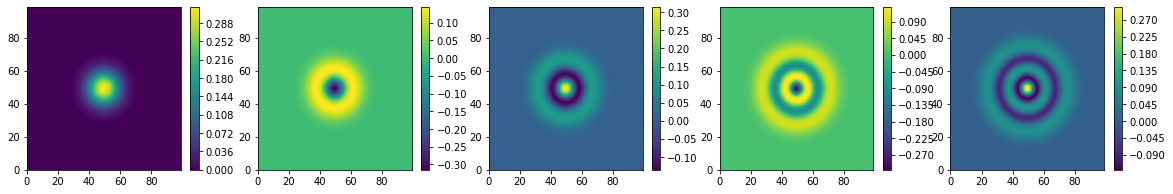

In [2]:
N=20
i=complex(0,1)
vac=q.basis(N)
xvec = np.linspace(-5,5,100)
fig, axs = plt.subplots(1,5,figsize=(20,3))
fock = vac
a=q.destroy(N)
for n in range(5):
  plot_w=q.wigner(fock,xvec,xvec)
  im=axs[n].contourf(plot_w,100)
  fock=(a.dag()*fock).unit()
  fig.colorbar(im,ax=axs[n])
plt.show()

[(1+0j), (0.30901699437494745+0.9510565162951535j), (-0.8090169943749473+0.5877852522924732j), (-0.8090169943749476-0.587785252292473j), (0.30901699437494723-0.9510565162951536j)]


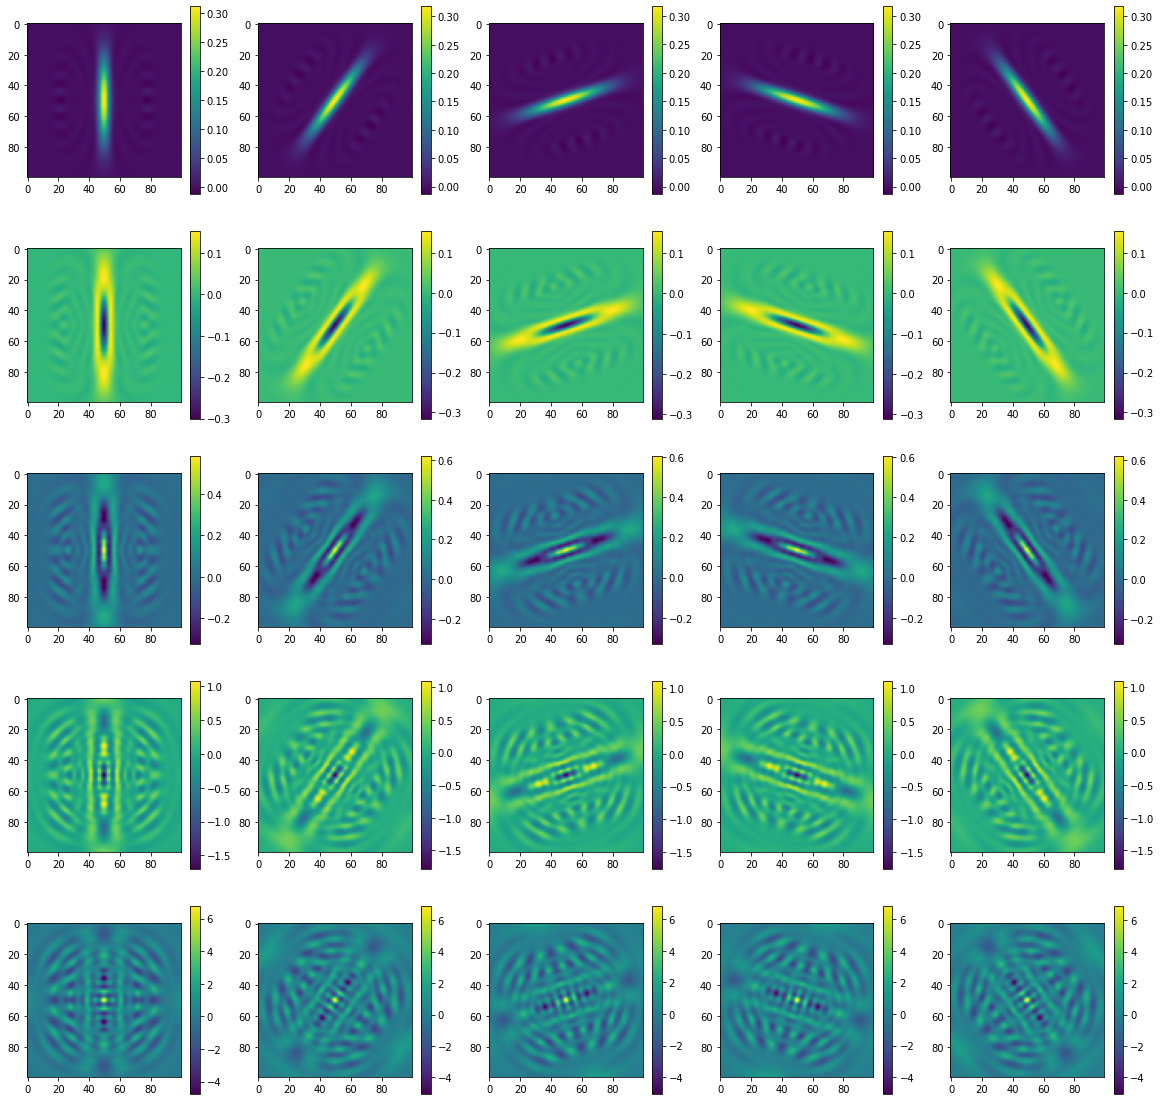

In [3]:
fig2, axs2 = plt.subplots(5,5,figsize=(20,20))
fock_states = [a.dag()**n *vac for n in range(5)]
sp_list=[np.exp(2*np.pi*complex(0,1)/5*n) for n in range(5)]
print(sp_list)
j=0
for sp in sp_list:
  i=0
  for n in range(5):
    plot_w=q.wigner(q.squeeze(N,sp)*fock_states[n],xvec,xvec)
    #im=axs2[:,j][i].contourf(plot_w,100)
    im=axs2[:,j][i].imshow(plot_w,interpolation='antialiased')
    fig2.colorbar(im,ax=axs2[:,j][i])
    i+=1
  j+=1
plt.show()

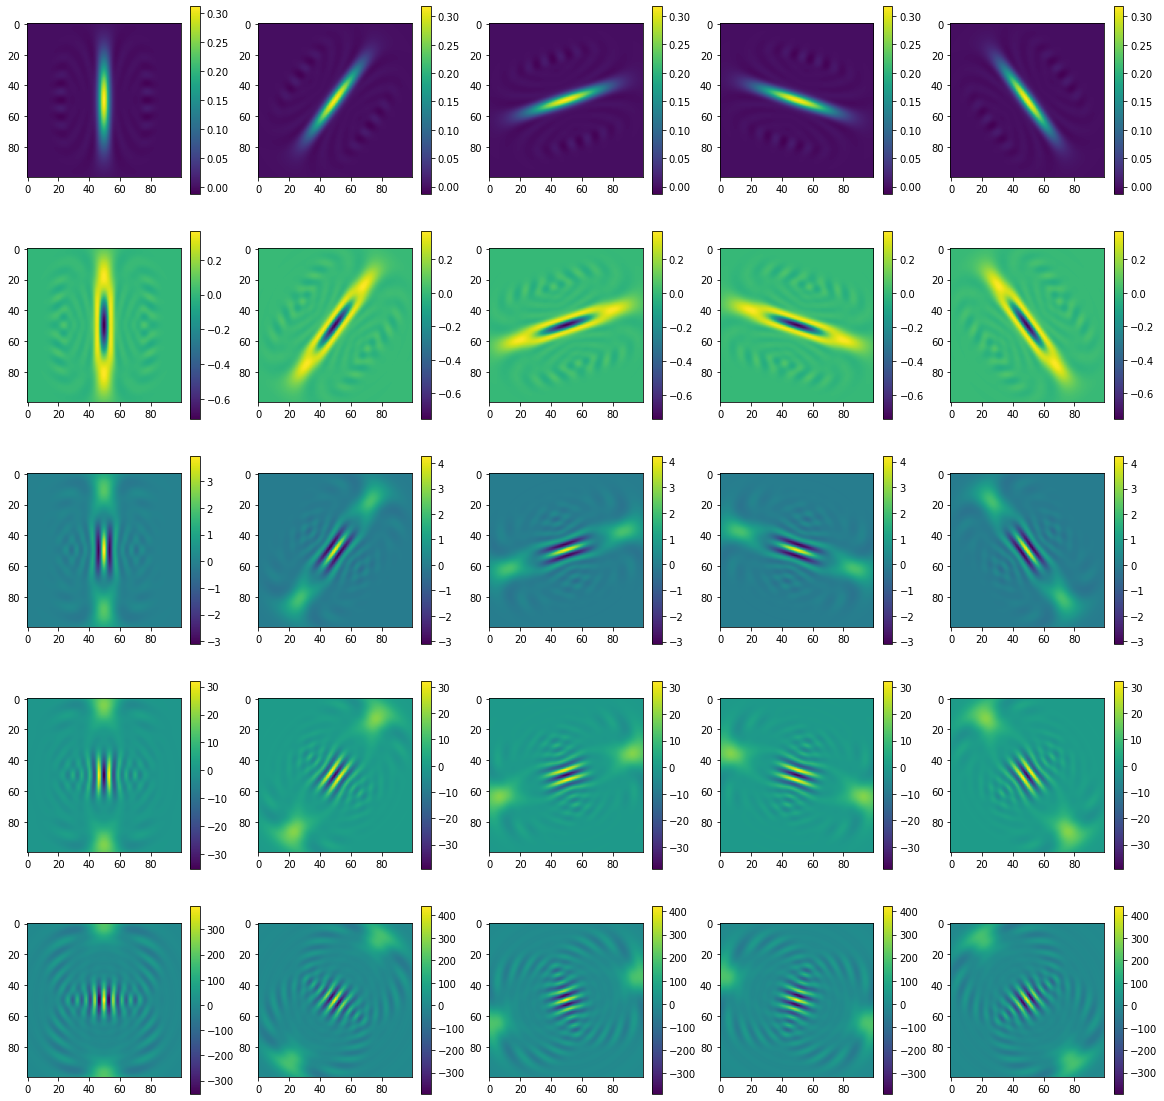

In [4]:
#ahora hacer squeezing antes de subir
fig3, axs3 = plt.subplots(5,5,figsize=(20,20))
sp_list=[np.exp(2*np.pi*complex(0,1)/5*n) for n in range(5)]
j=0
for sp in sp_list:
  i=0
  for n in range(5):
    plot_w=q.wigner((a.dag()**n)*q.squeeze(N,sp)*vac,xvec,xvec)
    #im=axs3[:,j][i].contourf(plot_w,100)
    im=axs3[:,j][i].imshow(plot_w,interpolation='antialiased')
    fig3.colorbar(im,ax=axs3[:,j][i])
    i+=1
  j+=1
plt.show()

#TWO-MODE SQUEEZING IN AN OPTICAL DIMER

In [5]:
#two state N=10
vac=q.basis(20)
two_state=q.tensor(vac,vac)
iu=complex(0,1)
#op. destruccion
a=q.tensor(q.destroy(20),q.identity(20))
b=q.tensor(q.identity(20),q.destroy(20))
#Hamiltonian

k=1
H=-k*(a.dag()*b+a*b.dag())
theta=[n*np.pi/4 for n in range(6)]

def U(th):
  return (-iu*th*H).expm()
#for th in theta:
#  print(th,U(th))
#  print(U(th).inv())
#U=(-i*th*H).expm()
#squeezing
def S(xi_a,xi_b):
  return q.tensor(q.squeeze(20,xi_a),q.squeeze(20,xi_b))

#psi=U.inv()*S(1,1)*U*two_state
psi_phases=[U(-th)*S(0.5,0.5)*U(th)*two_state for th in theta]
#print(psi_phases[0])


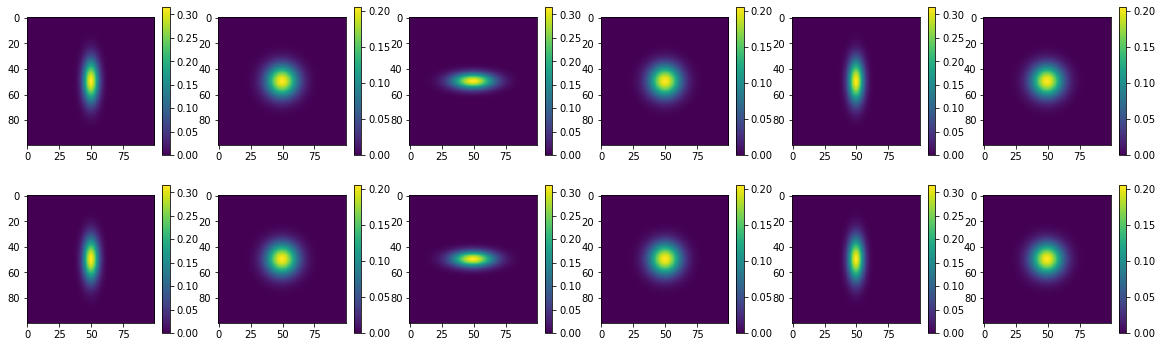

In [6]:
xvec = np.linspace(-5,5,100)
mode_a=[psi_phase.ptrace(0) for psi_phase in psi_phases]
mode_b=[psi_phase.ptrace(1) for psi_phase in psi_phases]

fig4, axes4 = plt.subplots(2,6,figsize=(20,6))
i=0
for mode in [mode_a,mode_b]:
  j=0
  for phase in mode:
    im=axes4[:,j][i].imshow(q.wigner(phase,xvec,xvec),interpolation='antialiased')
    fig4.colorbar(im,ax=axes4[:,j][i])
    j+=1
  i+=1
plt.show()

In [7]:
#quadratures
fi=np.exp(iu*np.pi/2)
X1a=0.5*(fi.conjugate()*a+fi*a.dag())
X2a=-iu*0.5*(fi.conjugate()*a-fi*a.dag())
X1b=0.5*(fi.conjugate()*b+fi*b.dag())
X2b=-iu*0.5*(fi.conjugate()*b-fi*b.dag())
X1m=(fi.conjugate()*(a+b)+fi*(a.dag()+b.dag()))/(2**(3/2))
X2m=-iu*(fi.conjugate()*(a+b)-fi*(a.dag()+b.dag()))/(2**(3/2))
def psi(th,a=0,b=0):
  return U(-th)*S(0.5,0.5)*U(th)*two_state
kz_space=np.linspace(0,5*np.pi/4,50)
#avg=[psi(kz).dag()*X1a*psi(kz) for kz in kz_space]
#avg_sqr=avg=[psi(kz).dag()*(X1a**2)*psi(kz) for kz in kz_space]
#var=[avg[i]-avg_sqr[i] for i in range(len(kz_space))]
#plt.plot(kz_space,var)



In [8]:
avg1a=[q.expect(X1a,psi(kz)) for kz in kz_space]
avg2a=[q.expect(X2a,psi(kz)) for kz in kz_space]
avg1b=[q.expect(X1b,psi(kz)) for kz in kz_space]
avg2b=[q.expect(X2b,psi(kz)) for kz in kz_space]
avg1m=[q.expect(X1m,psi(kz)) for kz in kz_space]
avg2m=[q.expect(X2m,psi(kz)) for kz in kz_space]
avg1a_sqr=[q.expect(X1a**2,psi(kz)) for kz in kz_space]
avg2a_sqr=[q.expect(X2a**2,psi(kz)) for kz in kz_space]
avg1b_sqr=[q.expect(X1b**2,psi(kz)) for kz in kz_space]
avg2b_sqr=[q.expect(X2b**2,psi(kz)) for kz in kz_space]
avg1m_sqr=[q.expect(X1m**2,psi(kz)) for kz in kz_space]
avg2m_sqr=[q.expect(X2m**2,psi(kz)) for kz in kz_space]

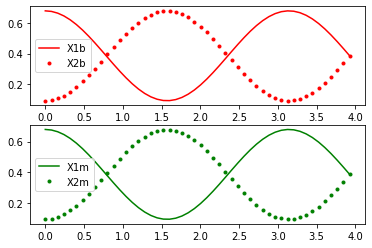

In [15]:
fig5, axs5 = plt.subplots(2,1)
#axs5.plot(kz_space,[avg1a_sqr[i]-avg1a[i]**2 for i in range(len(kz_space))],'b-',label='X1a')
#axs5.plot(kz_space,[avg2a_sqr[i]-avg2a[i]**2 for i in range(len(kz_space))],'b.-',label='X2a')
axs5[0].plot(kz_space,[avg1b_sqr[i]-avg1b[i]**2 for i in range(len(kz_space))],'r-',label='X1b')
axs5[0].plot(kz_space,[avg2b_sqr[i]-avg2b[i]**2 for i in range(len(kz_space))],'r.',label='X2b')
axs5[0].legend()
axs5[1].plot(kz_space,[avg1m_sqr[i]-avg1m[i]**2 for i in range(len(kz_space))],'g-',label='X1m')
axs5[1].plot(kz_space,[avg2m_sqr[i]-avg2m[i]**2 for i in range(len(kz_space))],'g.',label='X2m')
axs5[1].legend()
plt.show()